In [2]:
from matrix_implementation import *

In [3]:
import pandas as pd
df_adjacency = pd.DataFrame(adjacency_matrix, index=list_of_albums, columns=list_of_albums)
print("Macierz sąsiedztwa:")
df_adjacency

Macierz sąsiedztwa:


Brighter Days  \
Brighter Days                                            0   
Beauty Behind The Madness                                0   
Red Pill Blues (Deluxe)                                  0   
LANY                                                     0   
Fifth Harmony                                            0   
...                                                    ...   
BADLANDS (Deluxe)                                        0   
A Star Is Born Soundtrack (Without Dialogue)             0   
Nothing but the Beat 2.0                                 0   
reputation                                               0   
V                                                        0   

                                             Beauty Behind The Madness  \
Brighter Days                                                        0   
Beauty Behind The Madness                                            0   
Red Pill Blues (Deluxe)                                              0   
LANY                                                                 0   
Fifth Harmony                                                        0   
...                                                                ...   
BADLANDS (Deluxe)                                                    0   
A Star Is Born Soundtrack (Without Dialogue)                         0   
Nothing but the Beat 2.0                                             0   
reputation                                                           0   
V                                                                    0   

                                             Red Pill Blues (Deluxe) LANY  \
Brighter Days                                                      0    0   
Beauty Behind The Madness                                          0    0   
Red Pill Blues (Deluxe)                                            0    0   
LANY                                                               0    0   
Fifth Harmony                                                      0    0   
...                                                              ...  ...   
BADLANDS (Deluxe)                                                  0    0   
A Star Is Born Soundtrack (Without Dialogue)                       0    0   
Nothing but the Beat 2.0                                           0    0   
reputation                                                         1    0   
V                                                                  0    0   

                                             Fifth Harmony PRISM (Deluxe)  \
Brighter Days                                            0              0   
Beauty Behind The Madness                                0              0   
Red Pill Blues (Deluxe)                                  0              0   
LANY                                                     0              0   
Fifth Harmony                                            0              0   
...                                                    ...            ...   
BADLANDS (Deluxe)                                        0              0   
A Star Is Born Soundtrack (Without Dialogue)             0              0   
Nothing but the Beat 2.0                                 0              0   
reputation                                               0              0   
V                                                        0              0   

                                             Expectations Trigga Reloaded  \
Brighter Days                                           0               0   
Beauty Behind The Madness                               0               0   
Red Pill Blues (Deluxe)                                 0               0   
LANY                                                    0               0   
Fifth Harmony                                           0               0   
...                                                   ...             ...   
BADLANDS (Deluxe)     

In [4]:
df_incidence = pd.DataFrame(incidence_matrix, index=list_of_albums, columns=list_of_edges)
print("Macierz incydencji:")
df_incidence

Macierz incydencji:


(Trigga Reloaded, Nothing but the Beat 2.0)  \
Brighter Days                                                                          0   
Beauty Behind The Madness                                                              0   
Red Pill Blues (Deluxe)                                                                0   
LANY                                                                                   0   
Fifth Harmony                                                                          0   
...                                                                                  ...   
BADLANDS (Deluxe)                                                                      0   
A Star Is Born Soundtrack (Without Dialogue)                                           0   
Nothing but the Beat 2.0                                                               1   
reputation                                                                             0   
V                                                                                      0   

                                             (Unapologetic (Deluxe), Jungle Rules)  \
Brighter Days                                                                    0   
Beauty Behind The Madness                                                        0   
Red Pill Blues (Deluxe)                                                          0   
LANY                                                                             0   
Fifth Harmony                                                                    0   
...                                                                            ...   
BADLANDS (Deluxe)                                                                0   
A Star Is Born Soundtrack (Without Dialogue)                                     0   
Nothing but the Beat 2.0                                                         0   
reputation                                                                       0   
V                                                                                0   

                                             (Finesse (Remix) [feat. Cardi B], Taki Taki (with Selena Gomez, Ozuna & Cardi B))  \
Brighter Days                                                                                 0                                  
Beauty Behind The Madness                                                                     0                                  
Red Pill Blues (Deluxe)                                                                       0                                  
LANY                                                                                          0                                  
Fifth Harmony                                                                                 0                                  
...                                                                                         ...                                  
BADLANDS (Deluxe)                                                                             0                                  
A Star Is Born Soundtrack (Without Dialogue)                                                  0                                  
Nothing but the Beat 2.0                                                                      0                                  
reputation                                                                                    0                                  
V                                                                                             0                                  

                                             (Beach House 3, Scorpion)  \
Brighter Days                                                        0   
Beauty Behind The Madness                                            0   
Red Pill Blues (Deluxe)                                              0   
LANY                                              

In [5]:
from matrix_implementation import * 
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def create_from_adj_matrix(matrix, list_a):
    G = nx.Graph()

    for album in list_a:
        G.add_node(album)
    
    num_nodes = len(list_a)

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if matrix[i][j] == 1:
                G.add_edge(list_a[i], list_a[j])
    
    return G

In [7]:
def create_from_inc_matrix(matrix, list_a):
    G = nx.Graph()
    num_edges = matrix.shape[1]
    
    for album in list_a:
        G.add_node(album)

    for edge_idx in range(num_edges):
        nodes = np.where(matrix[:, edge_idx] == 1)[0]

        if len(nodes) == 2:
            G.add_edge(list_a[nodes[0]], list_a[nodes[1]])
    return G

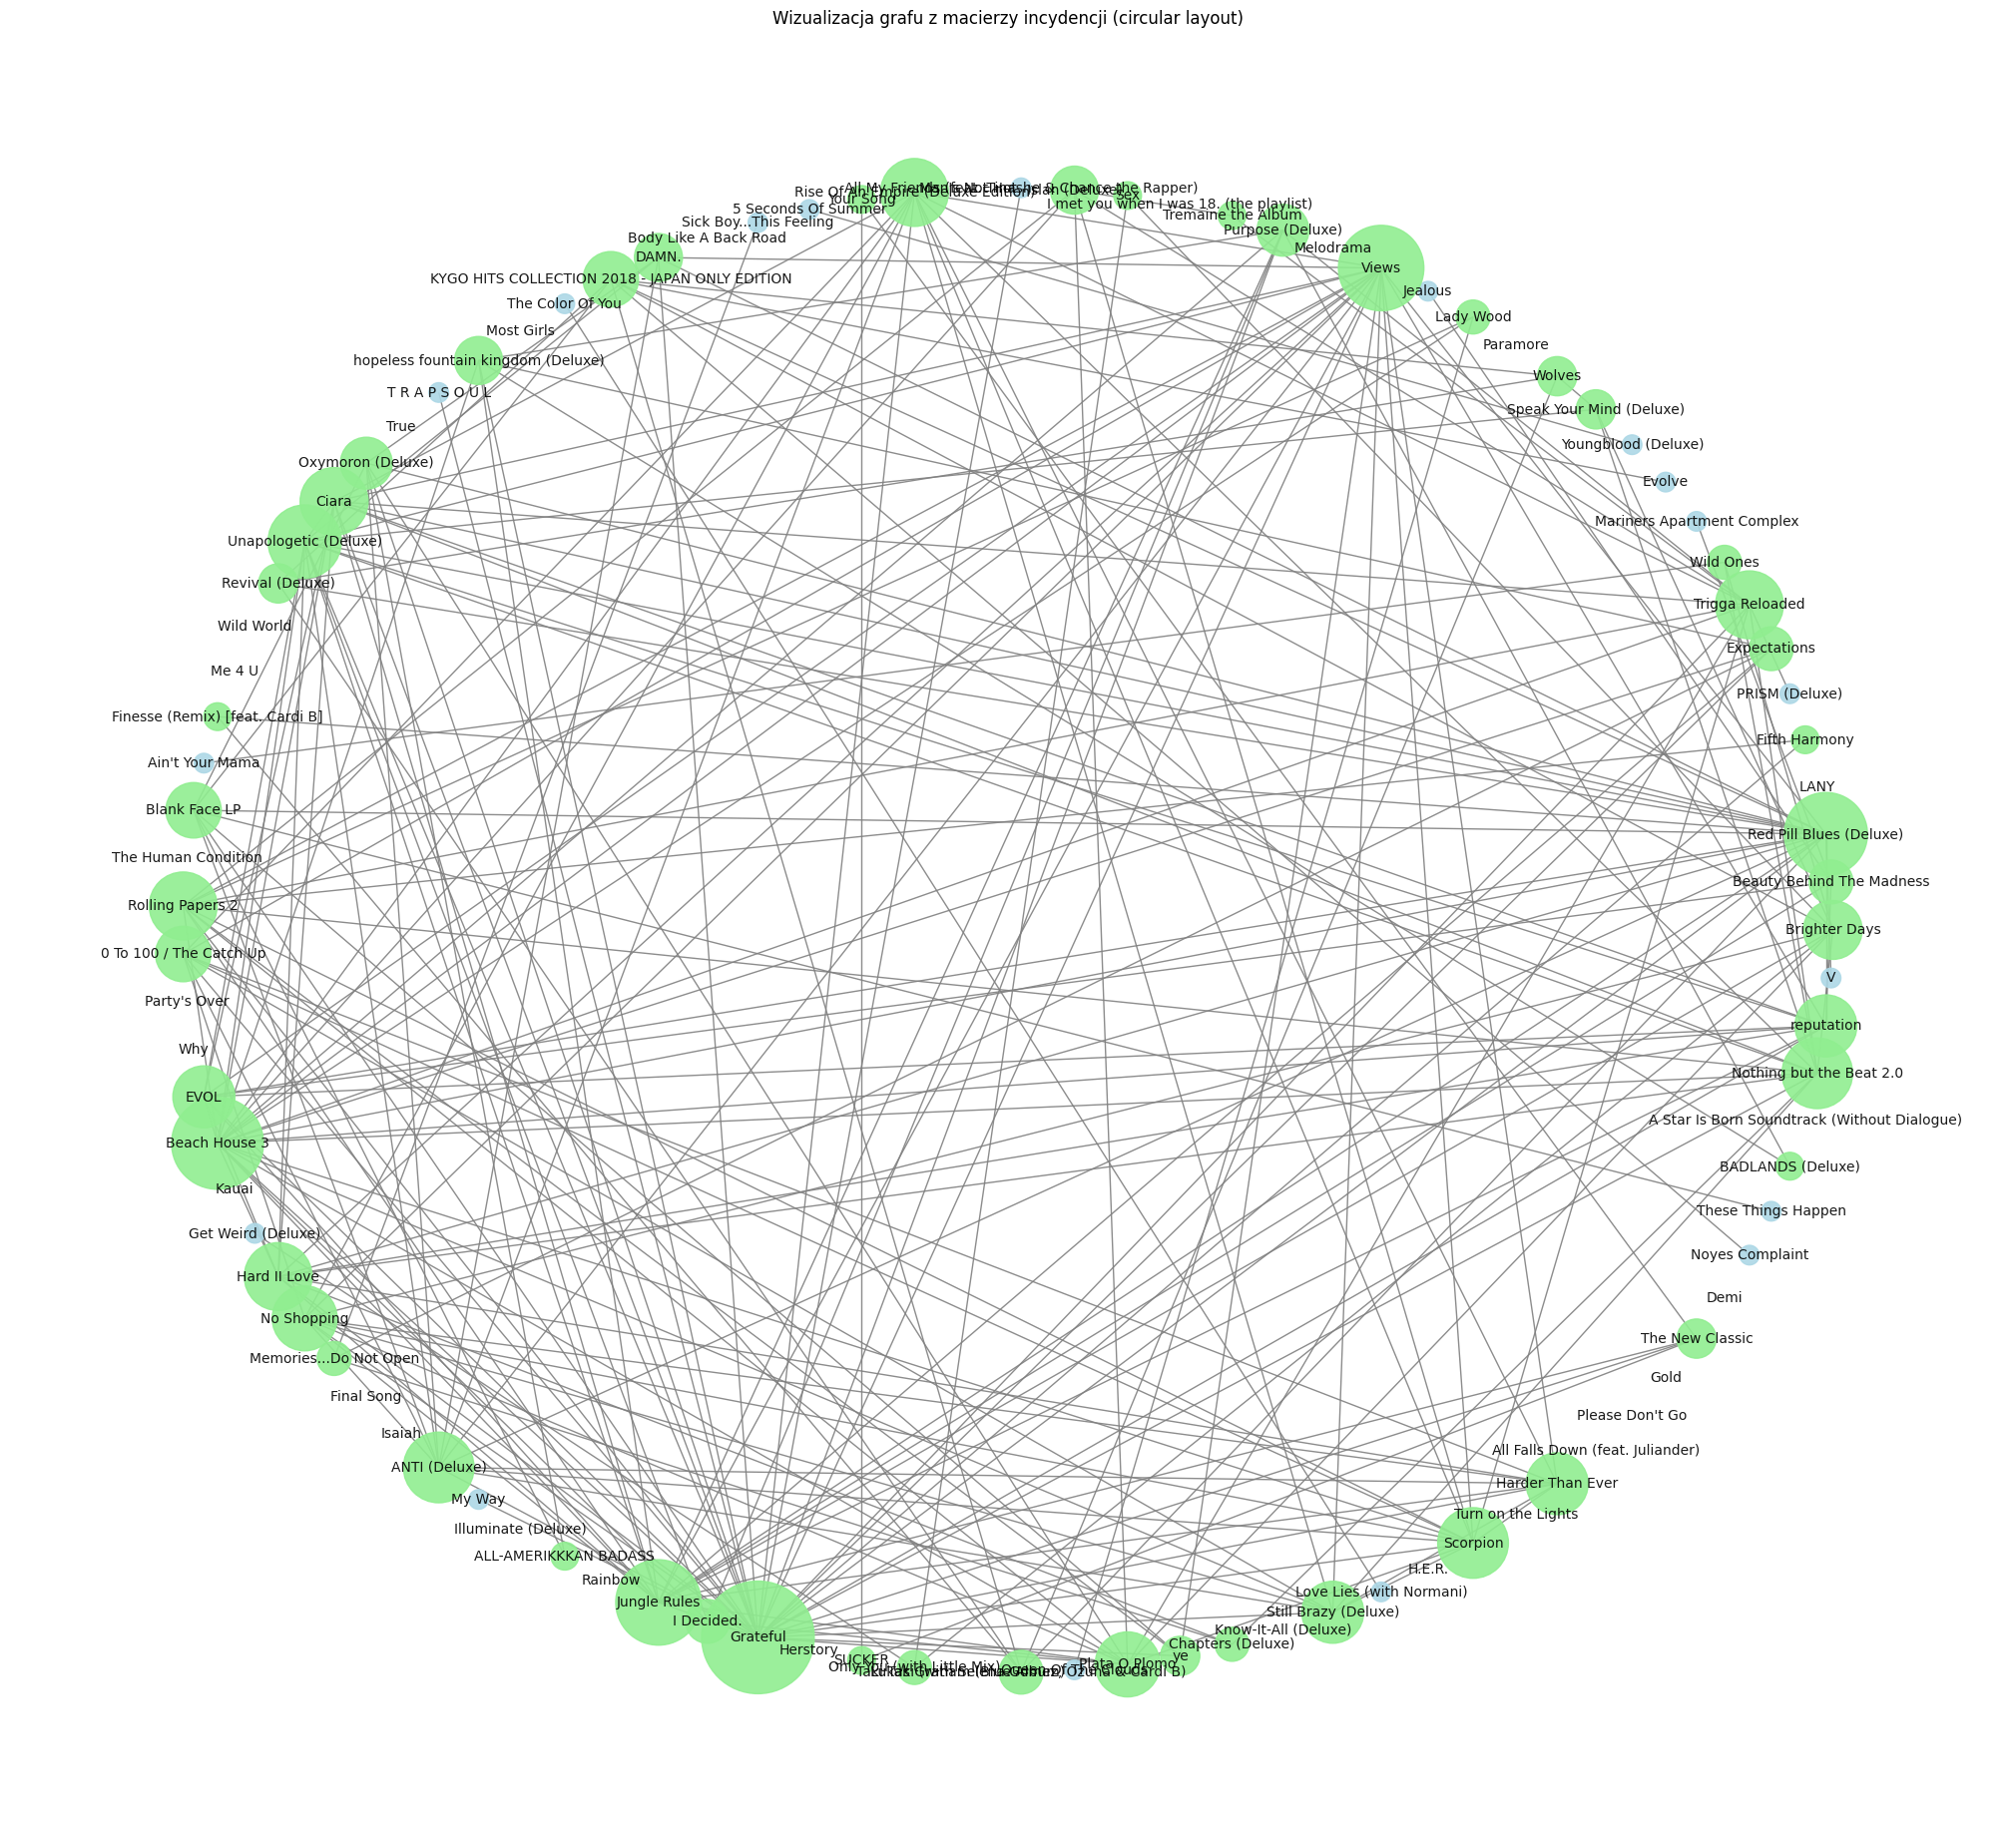

In [8]:
G_incydencji = create_from_inc_matrix(incidence_matrix, list_of_albums)


def show_graph(G):
    G = nx.relabel_nodes(G, lambda x: x.replace('$', 'S')) # prblem ze znakiem $ ze względu na wywietlanie nazw przy użyciu latexa 
    
    pos = nx.circular_layout(G)

    stopnie = [G.degree(n) for n in G.nodes()]

    node_size = np.array(stopnie) * 200  # Skalowanie rozmiaru węzłów na podstawie stopnia
    node_color = ['lightblue' if degree < 2 else 'lightgreen' for degree in stopnie]

    plt.figure(figsize=(20, 18))
    nx.draw(G, pos, with_labels=True, node_color=node_color, 
            node_size=node_size, font_size=10, font_color='black', 
            alpha=0.9, edge_color='gray')

    plt.title("Wizualizacja grafu z macierzy incydencji (circular layout)")
    plt.show()

show_graph(G_incydencji)


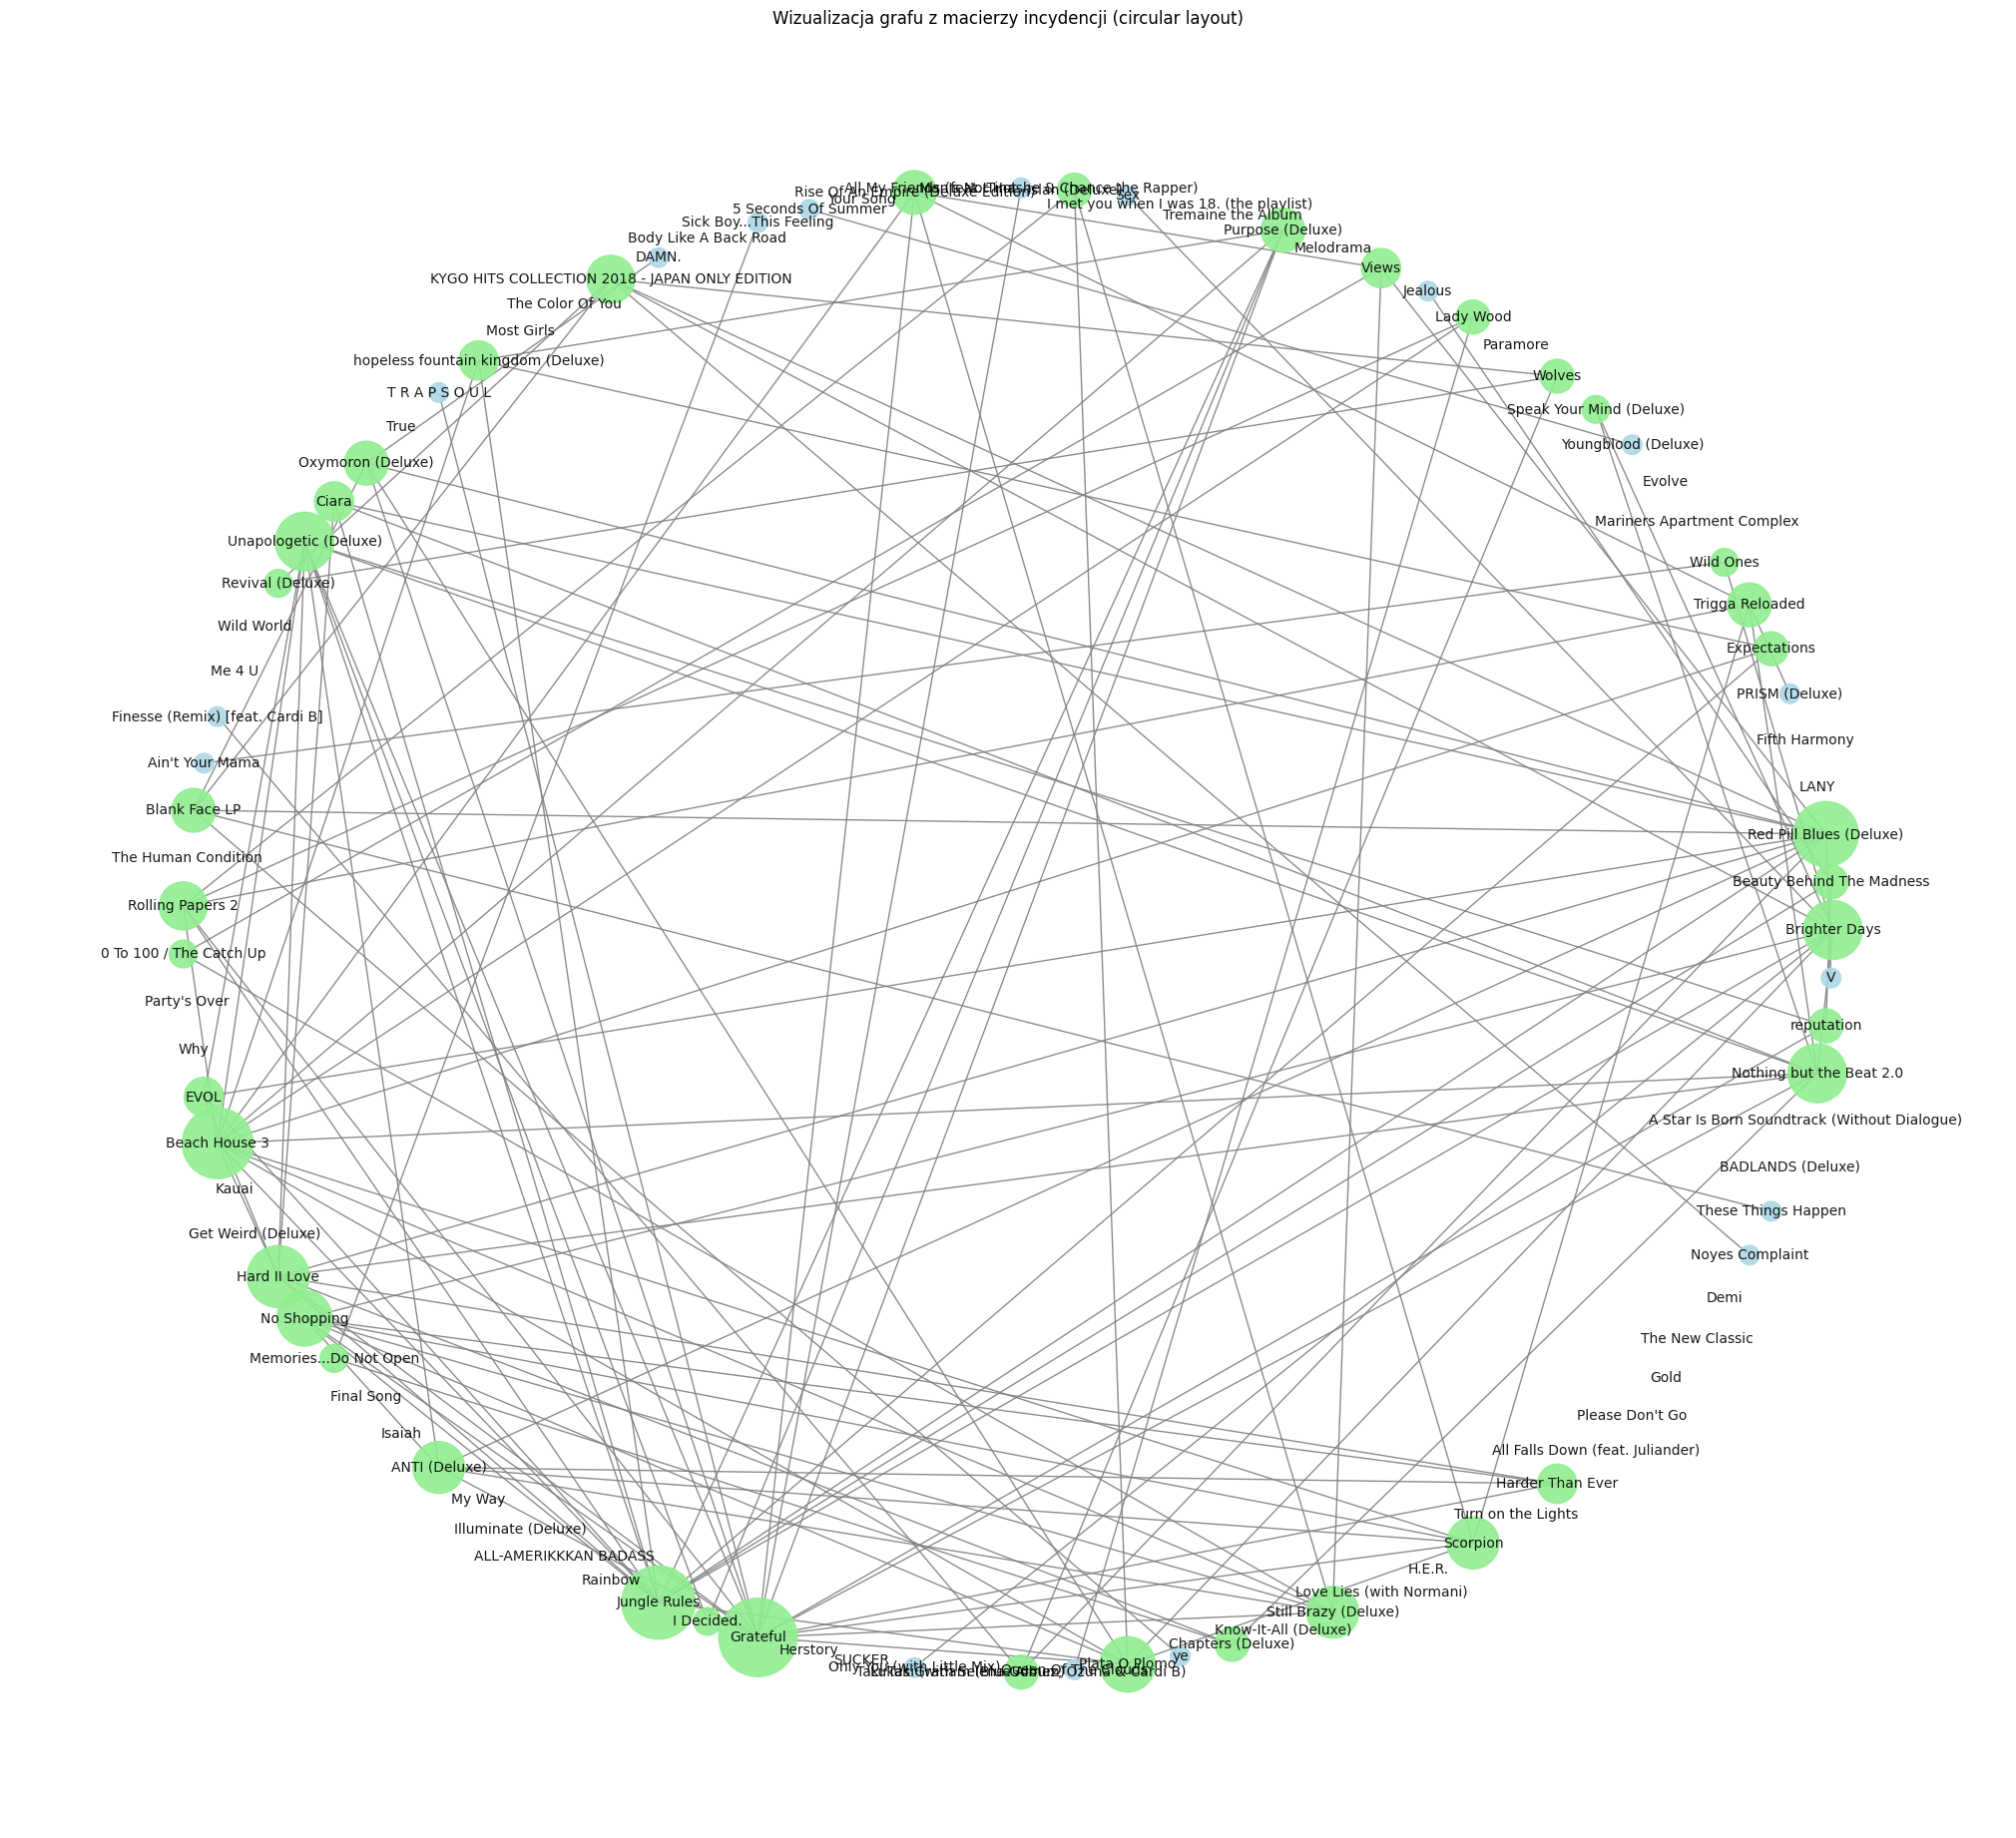

In [9]:
G_sasiedztwa = create_from_adj_matrix(adjacency_matrix, list_of_albums)
show_graph(G_sasiedztwa)

In [10]:
def show_graph2(G):
        G = nx.relabel_nodes(G, lambda x: x.replace('$', 'S'))
        pos = nx.spring_layout(G)
        stopnie = [G.degree(n) for n in G.nodes()]

        plt.figure(figsize=(15, 15))
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
                node_size=np.array(stopnie) * 200, font_size=10, font_color='black', 
                alpha=0.7, edge_color='gray')

        plt.title("Druga wizualizacja grafu z macierzy incydencji")
        plt.show()

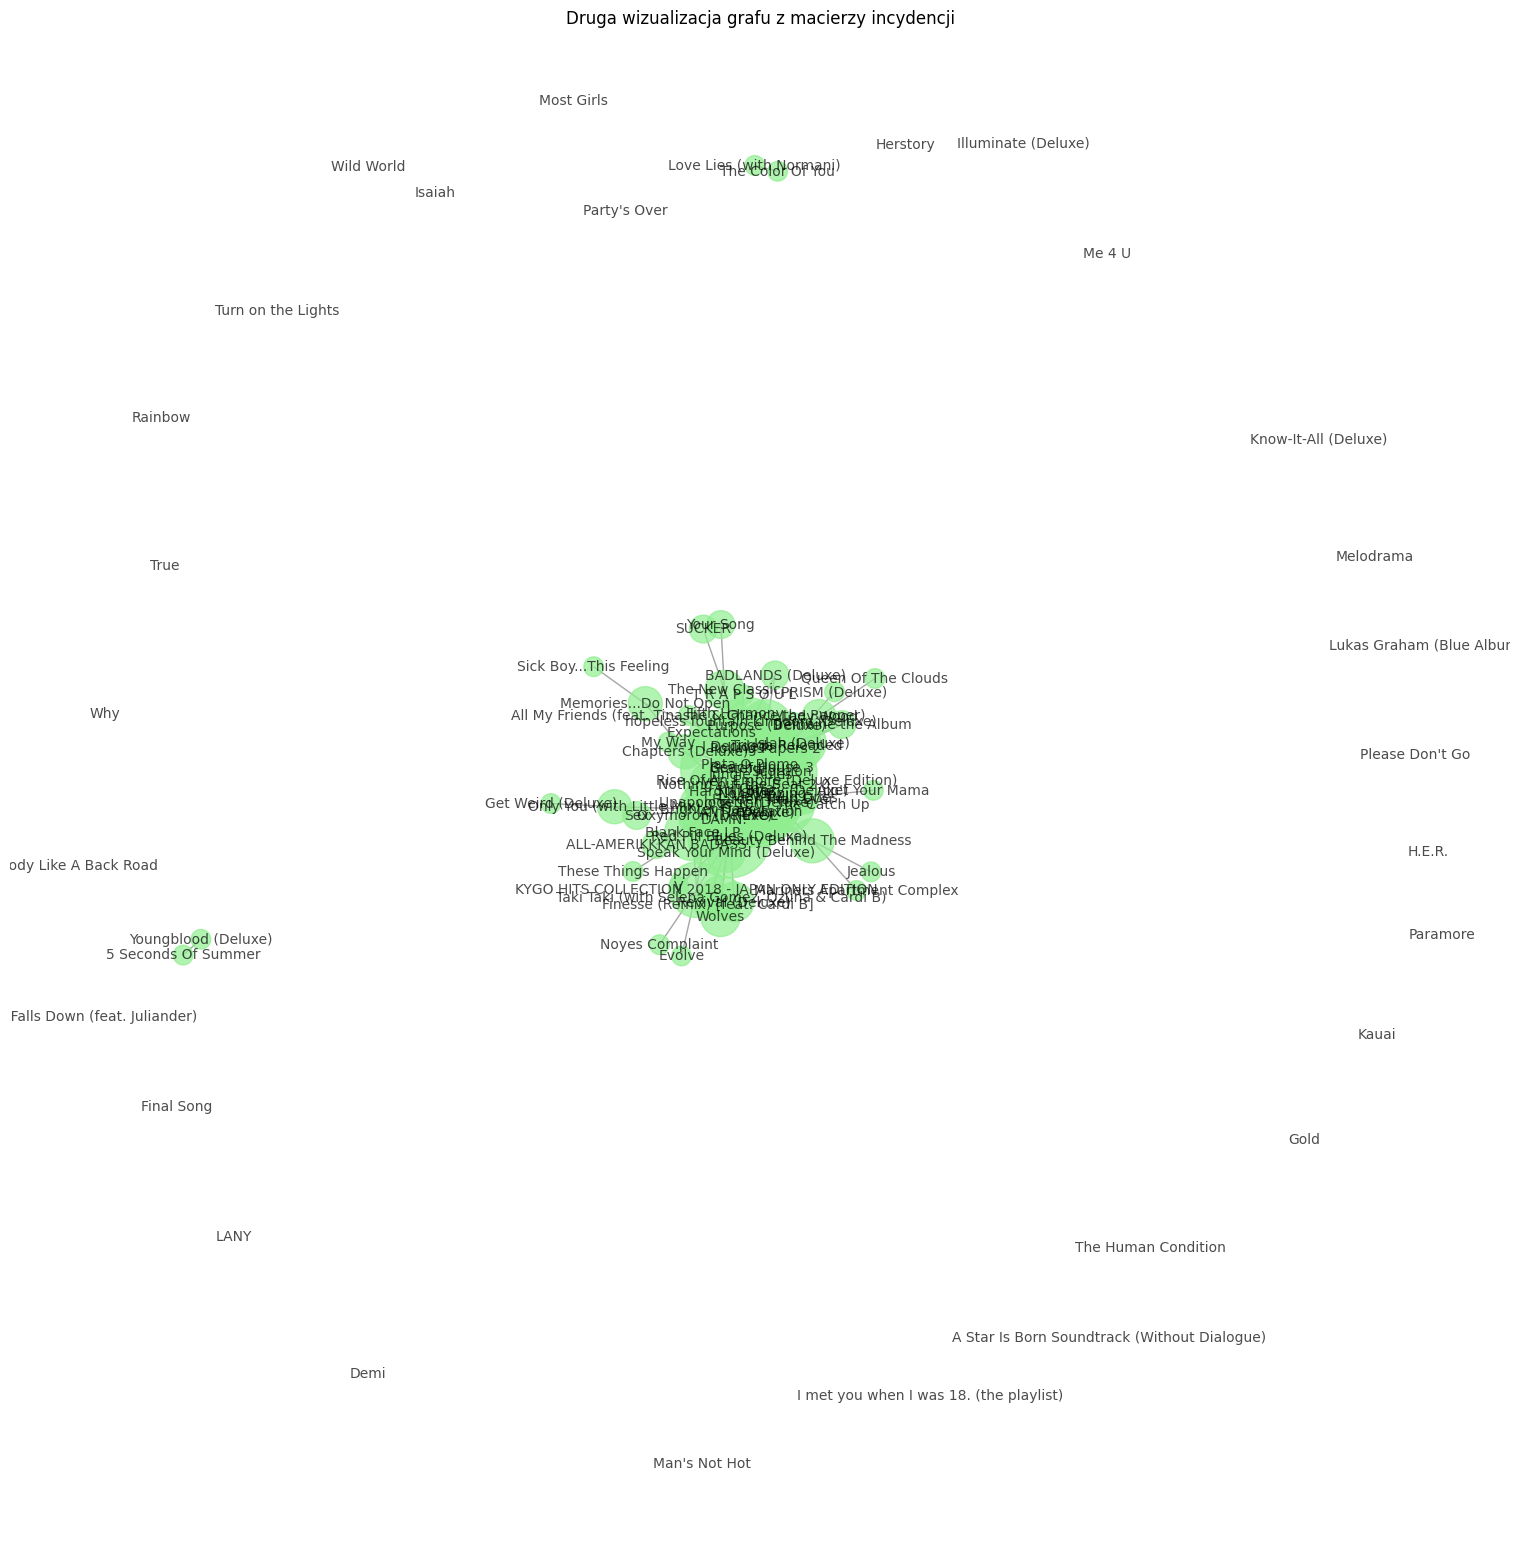

In [11]:
show_graph2(G_incydencji)

In [12]:
from pyvis.network import Network
import webbrowser

G = G_incydencji  

net = Network(notebook=True, cdn_resources='in_line')
net.from_nx(G)

html_content = net.generate_html()
with open("graf_incydencji.html", "w", encoding="utf-8") as file:
    file.write(html_content)

webbrowser.open("graf_incydencji.html")


True